**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Yasushi Oh
- Nancy Shen
- Taggert Smith
- Katelyn Villamin

# Research Question

Has the presence of PokeStops in Californian restaurants or cafes increased their traffic as measured by the frequency of Yelp check-ins? We will examine yelp check-ins frequency alongside the rate of Pokemon Go players over time, focusing on the initial release period in 2016.

## Background and Prior Work


The mobile game Pokémon Go has captivated the world since its 2016 release, drawing in millions of players who explored their surroundings through augmented reality (AR). By integrating location-based services, Pokémon Go influences real-world activities, as users seek "Pokéstops" and "Gyms" in various neighborhoods, which can, in turn, impact local businesses. The interaction between AR applications and physical businesses has become a point of interest, especially regarding how these digital engagements may affect the performance and reputation of nearby establishments. Given the sustained popularity of Pokémon Go, understanding its impact on local businesses is particularly relevant as other AR-based applications begin to emerge.
    Previous research has explored the intersection between Pokémon Go and local businesses, particularly focusing on the impact of nearby Pokéstops on restaurants' online reputations. Zhang and Zhang (2018) investigated whether the proximity to Pokéstops could enhance restaurant reviews, finding a positive correlation between nearby game locations and improved online rating suggests that the increased foot traffic from game players could translate into better business performance and online presence.
Similarly, Kondamudi et al. (2017) analyzed Yelp reviews to measure the impact of Pokémon Go on customer feedback. Their study revealed that restaurants and cafes near Pokéstops experienced a notable increase in reviews during the game's peak popularity, indicating heightened customer engagement and potentially increased sales . Zhu (2016) highlighted real-world strategies employed by restaurants to capitalize on the game's popularity, such as offering promotions to attract players. Furthermore,   Kondamud et al. (2021) and Zhang and Zhang (2021) have expanded on these findings, examining how AR games like Pokémon Go can significantly affect local businesses by increasing customer visits and sales . These insights underscomic implications of AR gaming and its potential to influence consumer behavior in the real world.

There were studies previously done with similar goals:
1. <a name="cite_note-1" href=""></a> [^](#cite_ref-1) Zhang, Y., Zhang, J. (2018) Could Nearby Pokéstops Improve Restaurants’ Online Reputation? *Hawaii International Conference on System Sciences*. https://scholarspace.manoa.hawaii.edu/server/api/core/bitstreams/748cbb5b-9718-45eb-b4ca-c5faeda1a959/content 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kondamudi, P., Protano, B., Alhoori, H. (25 June 2017) Pokemon Go: Impact on Yelp Reviews. *Web Science Conference ‘17* https://dl.acm.org/doi/abs/10.1145/3091478.3098861
3. <a name="cite_note-3"></a> [^](#cite_ref-2) Zhang, Y., Zhang J. (30 October 2021) Catch them all: Impact of location-based augmented reality mobile applications on local businesses. *Information & Management Volume 58, Issue 8* https://www.sciencedirect.com/science/article/pii/S0378720621001245
4. <a name="cite_note-4"></a> [^](#cite_ref-2) Yehong Zhu (16 July 2016) 5 Brilliant Ways Restaurants Are Using Pokémon Go To Level Up Sales. *Forbes* https://www.forbes.com/sites/yehongzhu/2016/07/16/5-brilliant-ways-restaurants-are-using-pokemon-go-to-level-up-sales/
5. <a name="cite_note-4"></a> [^](#cite_ref-2) Pamuru, V., Khern-am-nuai, W., Kannan, Karthik (21 April 2021) The Impact of an Augmented-Reality Game on Local Business: A study of Pokemon Go on Restaurants. *Information System Research Volume 32, Issue 3*  https://pubsonline.informs.org/doi/10.1287/isre.2021.1004

# Hypothesis


We predict that PokéStops in Pokémon Go positively impact foot traffic at nearby locations, as seen by the frequency of Yelp check-ins. Since Pokémon Go saw a surge in popularity at launch, we believe that restaurants designated as PokéStops would have experienced a noticeable increase in visitors, resulting in a rise in the number of check-ins as well.

# Data

## Data overview

- Dataset #1: 
  - Dataset Name: PokéStop Coordinates
  - Link to the dataset: https://www.pogomap.info/ 
  - Number of observations: 386
  - Number of variables: 2 (latitude, longitude)
- Dataset #2: 
  - Dataset Name: Yelp Reviews: business.json
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 150,000
  - Number of variables: 8 - business_id, name, address, city, state, zip, latitude, longitude
- Dataset #3: 
  - Dataset Name: Yelp Reviews: checkin.json 
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 131,930
  - Number of Variables: 2 - business_id, date 


The first dataset includes the coordinates in terms of longitude and latitude of pokestops and pokegyms where players are more likely to visit to collect rewards. The current dataset was scraped from the link aforementioned and includes coordinates of pokestops and gyms within the downtown Los Angeles area. However, if needed, we are able to adjust the location of pokestop through our code that will scrape data from the website for pokestops and pokegyms in other locations. The data within this dataset is already cleaned as it just consists of a singular list with each pokestops coordinates. If needed, we can incorporate distinctions between pokestops and pokegyms within the dataset for further analysis on whether pokegyms or pokestops have more of a correlation with yelp reviews. 

Dataset 2 is taken from yelp’s official database and includes information on the businesses with yelp reviews, their IDs, names, addresses, and coordinates. We plan on using their addresses and coordinates to match the pokestop information from dataset 1. We’ve cleaned this dataset by querying categories that match restaurant data then querying again for restaurants that are in California. 
Dataset 3 is also taken from yelp’s official database. This dataset includes information about customer interactions with businesses. It’s composed of 2 columns: business_id, and date, where business_id is an unique identifier of each individual business and date is the date during which customers checked in or visited that business. We cleaned this dataset by merging it to the already cleaned dataset 2 using business_id’s in order to find out when customers went to a restaurant. 

We will combine these datasets as follows:
We merge Datasets #2 and #3 by business_id to create a combined dataset with business names and their check in data, and then query for businesses that identify as restaurants.
We filter the resulting dataset by coordinates to include only restaurants in our target area (likely downtown LA)
We calculate the total number of check-ins for each observation in Dataset #2 by month, for each month in our observation period, and add them as columns to each observation in the resulting dataset.
We split the resulting dataset into “Near Pokestop” restaurants and “No Pokestop” restaurants, by checking with Dataset #1 to determine whether they have a pokestop within 80m (the maximum interaction distance in Pokémon GO).


## Dataset #1 (use name instead of number here)

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

## Yelp Restaurants Check Ins

In [1]:
import pandas as pd

In [2]:
#Load business.json and checkin.json as a pandas dataframe
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
checkin_data = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

# Use json_normalize to flatten the structure
business = pd.json_normalize(business_data.to_dict(orient="records"))
checkin = pd.json_normalize(checkin_data.to_dict(orient="records"))

#Explode the string format checkin dates into separate rows values
checkin['date'] = checkin['date'].str.split(',')
checkin =checkin.explode('date')

In [9]:
#Take only the necessary columns
business_cleaned= business[['business_id','name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'categories']]

#Rename columns
business_cleaned= business_cleaned.rename(columns={'name': 'Name', 'address': 'Street Address', 'city': 'City', 'state': 'State', 'postal_code': 'Zip Code'})

#Merge businesses with the checkins
merged= pd.merge(business_cleaned, checkin, how='left', on='business_id')

#Look for businesses that are restaurants only based on categories
categories= ['Food', 'Restaurants', 'Coffee', 'Bars']
pattern= '|'.join(categories)
restaurants= merged[merged['categories'].str.contains(pattern, case=False, na=False)]

#Look for restaurants in CA only
restaurants= restaurants[restaurants['State']== 'CA']
restaurants= restaurants.rename(columns={'date':'Check-in Date'})

restaurants

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date
7131,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 21:28:20
7132,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 22:15:29
7133,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 23:35:53
7134,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-12 18:33:30
7135,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-16 19:50:46
...,...,...,...,...,...,...,...,...,...,...
13370634,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-01-26 04:46:11
13370635,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-02-04 23:35:20
13370636,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-02-23 23:15:13
13370637,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-04-07 21:37:23


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [4]:
#load the data.json file for all the downtown LA coordinates
downtown_la = pd.read_json('data.json')

#split the data so we can see latitude and longitude in separate columns
downtown_la[['latitude', 'longitude']] = downtown_la[0].str.split(', ', expand=True)

#remove the column that had combined latitudes and longitudes
downtown_la = downtown_la.drop(columns=0)

#convert str to float for each column
downtown_la['latitude'] = downtown_la['latitude'].astype('float64')
downtown_la['longitude'] = downtown_la['longitude'].astype('float64')

downtown_la.head()

,latitude,longitude
0,34.051482,-118.261797
1,34.046301,-118.237488
2,34.056658,-118.237690
3,34.050214,-118.239153
4,34.054469,-118.262869


In [16]:
restaurants[['Name']].drop_duplicates().reset_index(drop=True)

,Name
0,Helena Avenue Bakery
1,Santa Barbara Shellfish Company
2,California Tacos and Taproom
3,Marty's Pizza
4,Cal Taco
...,...
1437,Good Stuff Baked Treats
1438,Woody's Roundup Bar & Grill
1439,Vino Divino
1440,Kyle's Isla Vista


In [17]:
restaurants[['City']].drop_duplicates().reset_index(drop=True)

,City
0,Santa Barbara
1,Isla Vista
2,Goleta
3,Carpinteria
4,Montecito
5,Port Hueneme
6,Summerland
7,Santa Clara
8,Santa Barbara
9,Truckee


In [5]:
#find the min and max latitudes and longitudes
min_latitude = downtown_la['latitude'].min()
min_longitude = downtown_la['longitude'].min()
max_latitude = downtown_la['latitude'].max()
max_longitude = downtown_la['longitude'].max()

print(f"min_dtla_coords: {min_latitude}, {min_longitude}; max_dtla_coords: {max_latitude}, {max_longitude}")

min_dtla_coords: 34.040041, -118.268222; max_dtla_coords: 34.064352, -118.230497


In [6]:
#query restuarants dataframe so that it only shows restaurants within the downtown la area
latitude_query = (restaurants['latitude'] >= min_latitude) & (restaurants['latitude'] <= max_latitude)
longitude_query = (restaurants['longitude'] >= min_longitude) & (restaurants['longitude'] <= max_longitude)
restaurants_dtla = restaurants[ latitude_query & longitude_query]
restaurants_dtla

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date


In [7]:
restaurants_latitude_max = restaurants['latitude'].max()
restaurants_latitude_min = restaurants['latitude'].min()
restaurants_longitude_max = restaurants['longitude'].max()
restaurants_longitude_min = restaurants['longitude'].min()


print(f"min_restaurant_coords: {restaurants_latitude_min}, {restaurants_longitude_min}; max_restaurant_coords: {restaurants_latitude_max}, {restaurants_longitude_max}")

min_restaurant_coords: 32.321229, -120.083748; max_restaurant_coords: 39.382812, -111.046396


In [8]:
restaurants[['latitude', 'longitude']].describe()

,latitude,longitude
count,544016.000000,544016.000000
mean,34.421026,-119.718377
std,0.044878,0.141638
min,32.321229,-120.083748
25%,34.414340,-119.739681
50%,34.419744,-119.699996
75%,34.427943,-119.691117
max,39.382812,-111.046396


(array([5.43993e+05, 2.30000e+01]),
 array([32.321229 , 35.8520205, 39.382812 ]),
 <BarContainer object of 2 artists>)

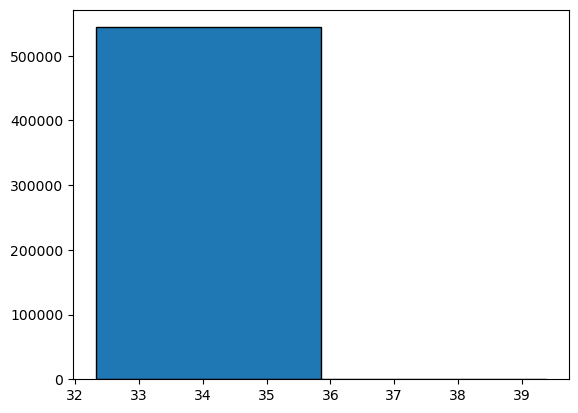

In [59]:
import matplotlib.pyplot as plt

plt.hist(restaurants['latitude'], bins=2, edgecolor='black')

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

Our proposed data does carry certain unavoidable biases. There will certainly be obscure personal biases in selecting cases to examine, which we will try to reduce by outlining an elaborate set of criteria for selecting the most representative sample of restaurants that we can while ensuring that confounding factors we can anticipate are minimized, and by having each member of our group contribute to the selection process. 

However, we are aware—thanks to prior work on Pokemon Go hotspot distributions—that PokeStops are concentrated disproportionately in areas with socioeconomically advantaged populations, making it more likely that our selected cases will be from one of those areas, and thus our findings may not be generalizable to disadvantaged populations. Additionally, by necessity our study will likely draw from areas that have experienced consistent economic success and stability, as our case studies need to have been in business since at least 2016. Moreover, our analysis will be stronger if we look at areas with less historical instability, meaning fewer confounds in our dataset. To mitigate this, we may intentionally select from various areas with different socioeconomic statuses (i.e. high traffic low income areas, low traffic low income areas, etc.) to attempt to balance out the biases in our overall dataset.

Additionally and unavoidably, due to the nature of Pokemon Go as an online AR video game, we are focused on only people with smartphones and cellular data, resulting in a selection bias. 
Some data we collect—i.e. Yelp reviews—might contain user identifiable information such as username and profile pictures. Any privacy issues can be avoided here by anonymizing our individual data. However, it will be more difficult to anonymize the establishments we look at, as their location data is relevant to our study, and our paper could have unforeseen consequences for those specific establishments. 

We will also consult prior work regarding the use of Yelp review data, such as [this paper](https://pubsonline.informs.org/doi/epdf/10.1287/mnsc.2015.2304) on Yelp review fraud, to understand the potential impacts on the results and ethics of our project.


# Team Expectations 

- Clear and timely communication through the group chat 
- Respect to the weekly deadlines and communicate beforehand if there’s any delays
- Communicate any issues that may require help from other groupmates

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/1  |  1 PM | Do background research on topic <br> 1. Shortlist of candidates for case studies based on found datasets (). <br>  2. Figuring out how to scrape yelp reviews if needed ().  <br> 3. Finding auxiliary datasets (). <br>  4. Background research on viable methodologies.  | Decide on case studies & credible datasets we will use. Discuss project scope. | 
| 11/8  |  1 PM | Compile final datasets needed | Update each other on background research done, outline project methodology, and elegate tasks to each member | 
| 11/15  | 1 PM  | Compile and import data, set up jupyter notebook  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/22  | 1 PM  | Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 11/29  | 1 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 12/6  | 1 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 12/11  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |